In [1]:
import numpy as np
import matplotlib.pyplot as plt
from intfeat import StrumLiouvilleBasis, plot_sl_basis
import math

# KT Smoothing

In [2]:
max_val = 1000

In [3]:
def kt_smoothed_histogram(data, max_val, prior=0.5):
    data = np.clip(data, 0, max_val - 1)  # chop-off the tail
    raw_counts = np.bincount(data, minlength=max_val)  # compute raw counts
    return (raw_counts + prior) / (np.size(data) + prior * max_val)

In [4]:
weights = 1 / (1 + np.arange(1000))
numbers = np.random.choice(1000, size=100000, p=weights/np.sum(weights))

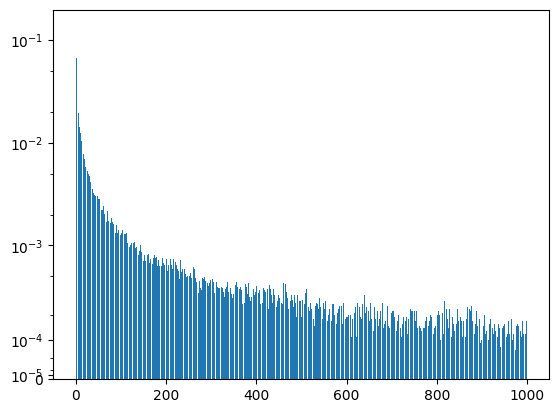

In [5]:
raw_histogram = np.bincount(numbers, minlength=1000) / len(numbers)
plt.bar(np.arange(1000), raw_histogram)
plt.yscale('asinh', linear_width=1e-4)

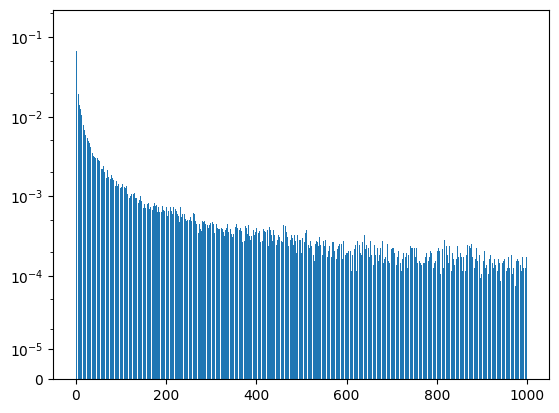

In [6]:
kt_hist = kt_smoothed_histogram(numbers, max_val=1000)
plt.bar(np.arange(1000), kt_hist)
plt.yscale('asinh', linear_width=1e-5)

In [7]:
np.min(kt_hist)

np.float64(4.477611940298508e-05)

# SL basis from KT weights

In [8]:
num_func = 12
basis = StrumLiouvilleBasis(max_val=max_val, num_funcs=num_func, weight_config=kt_hist, curvature_config=0.5)

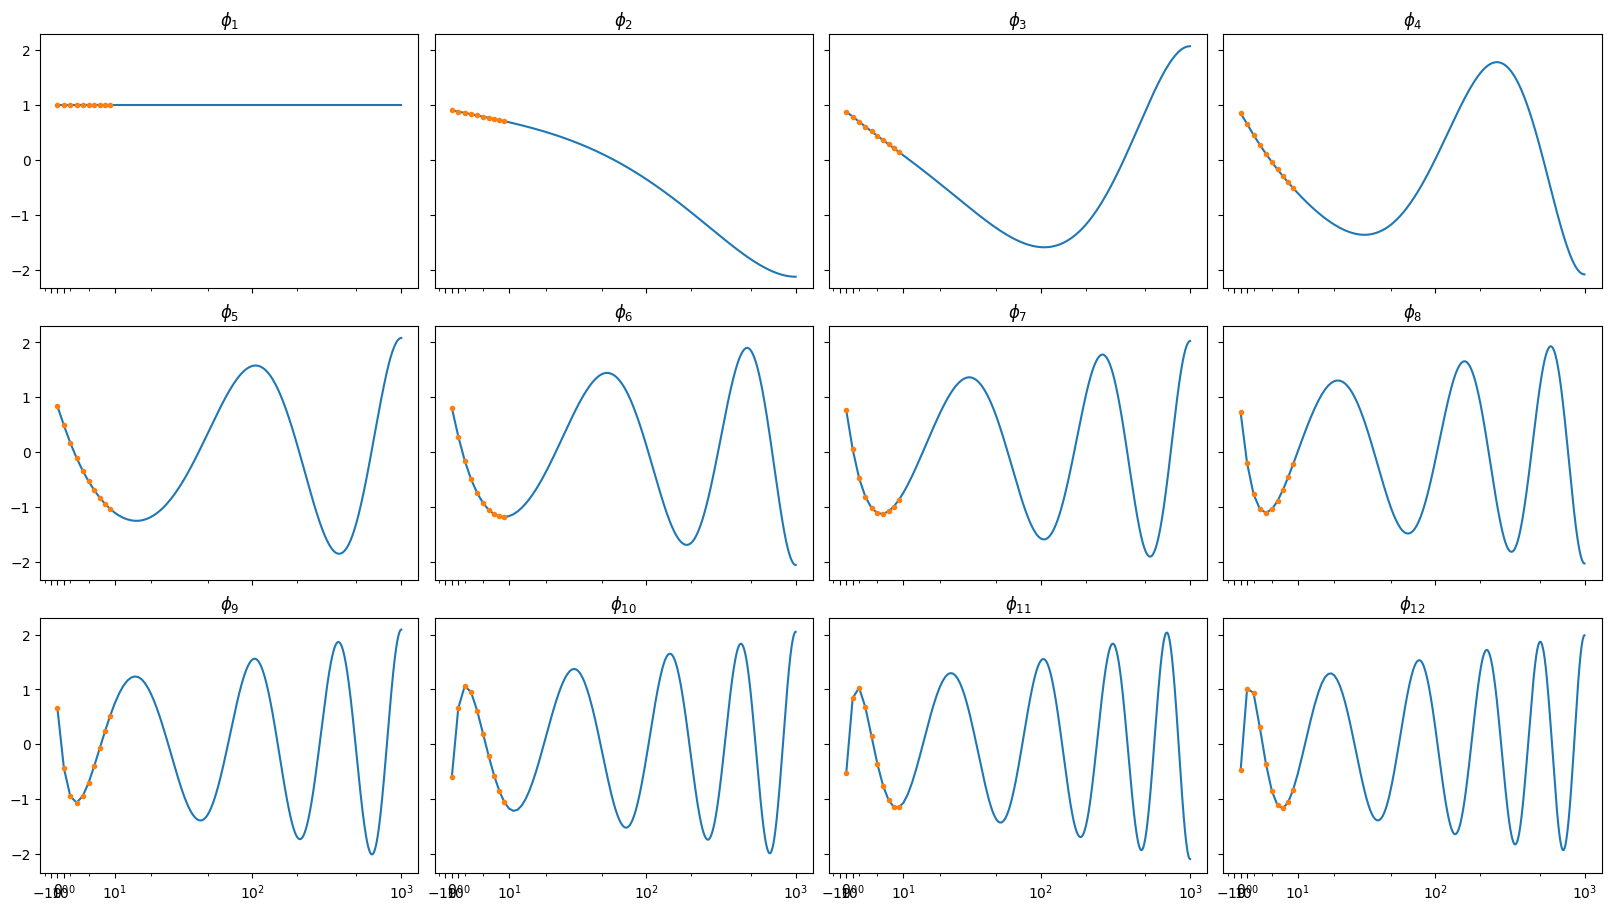

In [9]:
plot_sl_basis(basis)
plt.show()